[5.476915584518425, 3.9560544668562607, 3.759600706917897]
[2.748031361466587, 2.0921074093855743]


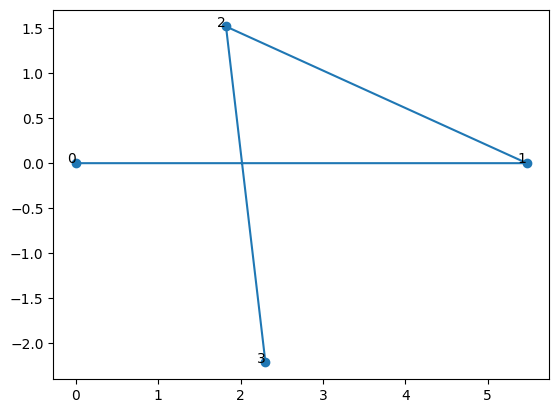

crossed


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_points(min,sum):
    origin = np.array([0, 0])  # 点0の座標
    randoms = [1, 1, 1] # null safety
    angles = [0.2, 0.2] # null safety
    for i in range(3):
        randoms_seed = random.uniform(0,1)
        randoms[i] = randoms_seed * (sum - min) + min  #rand * (SUM - min) + min
    for i in range(2):
        angle_seed = random.uniform(0,1)
        angles[i] = angle_seed * np.pi
    print(randoms)
    print(angles)

    p1 = np.array( [origin[0] + randoms[0], origin[1]] )
    p2 = np.array( [p1[0] + randoms[1] * np.cos(angles[0]), p1[1] + randoms[1] * np.sin(angles[0]) ] )
    p3 = np.array( [p2[0] + randoms[2] * np.cos(angles[0] + angles[1]), p2[1] + randoms[2] * np.sin(angles[0] + angles[1]) ])
    points = [origin, p1, p2, p3]

    return points

def calculate_vectors(points):
    v01 = points[1] - points[0]
    v23 = points[3] - points[2]
    return v01, v23

def check_intersection(points, vectors):
    result = np.linalg.solve(np.vstack((vectors[0], -vectors[1])).T, points[2] - points[0])
    s = result[0]
    t = result[1]

    return s, t

def is_parallel(cos_theta):
    cos_pi = 0.999
    return np.abs(cos_theta) >= cos_pi

def check_conditions(points,ss,tt):
    MIN = 2.2 
    if np.linalg.norm(points[0] - points[3]) < MIN:
        return "False0-3"
    if np.linalg.norm(points[0] - points[2]) < MIN:
        return "False0-2"
    if np.linalg.norm(points[1] - points[3]) < MIN:
        return "False1-3"
    if 0 < ss < 1 and 0 < tt < 1:
        return "crossed"
    else:
        return "not crossed"

def plot_points(points):
    plt.figure()
    plt.plot(*zip(*points), marker='o')
    for i, p in enumerate(points):
        plt.text(p[0], p[1], str(i), ha='right')
    plt.show()

def main():
    # データの生成
    MIN = 2.2
    SUM = 5.8
    points = generate_points(MIN,SUM)

    # ベクトルの計算
    v01, v23 = calculate_vectors(points)
    vectors = [v01, v23]

    # 交点の判定
    result = check_intersection(points, vectors)
    s = result[0]
    t = result[1]

    # 辺の平行判定
    cos_theta = np.dot(vectors[0], vectors[1]) / (np.linalg.norm(vectors[0]) * np.linalg.norm(vectors[1]))
    if is_parallel(cos_theta):
        s = 10
        t = 10

    # 結果の出力とプロット
    result = check_conditions(points,s,t)
    if result == "not crossed":
        plot_points(points)
        print(result)
    elif result == "crossed":
        plot_points(points)
        print(result)
    else:
        print(result)

# main関数の実行
if __name__ == "__main__":
    main()
